# AIDI 1010 - Group Assignment 3
### Group 1
# **MOVIE RECOMMENDATION SYSTEM**
![](https://drive.google.com/uc?export=view&id=1yXOecvlvkYL4TtmE6zWv6DFcoadcXpSc)

### Group 1
200486749 - Ajibola Adeyemo<br>
200500887 - Venkata krishnaveni Pichipati<br>
200491947 - Marimuthu Venkatesan<br>
200499147 - Manasa Yazali

# Contents
1. Header Documentation
2. Problem Statement
3. Python Code
>3.1 Data<br>
>3.2 Data cleaning
4. Machine Learning Prediction & Outocomes
>4.1 Demographic filtering<br>
>4.2 Content based filtering<br>
>>4.2.1 Plot description based recommender<br>
>>4.2.2 Credits, genre and keywords based recommender
>4.3 Collaborative filtering
>4.4 Movie rating prediction
>4.5 AutoML - Autosklearn Implementation
5. Visualization
6. Trailer Documentation

# 1. Header Documentation
- Web and app consumers want individualized experiences in today's fast-paced digital environment. Everything changes in the digital world in seconds, and users are not ready to invest the time and effort to key in their details and search for new content. They expect the apps, social networks, and online stores to remember their details and interests to provide individualized and relevant new content and products based on their history or previous activities. Any website or application that fails to include these details will see a decline in its users.
- In this project, we will be building a recommendation system for movies streaming on the OTT(Over The Top) platform. A movie recommendation is vital in our social lives. Because of its ability to provide improved entertainment. Users can be recommended a set of movies based on their interests or the popularity of the films.
- Although several movie recommendation systems have been introduced, the vast majority of them either cannot recommend a movie to exist users efficiently or cannot recommend a movie to new users at all. • In this project, we present a movie recommendation system that can recommend films to both new and existing users.
- We used the dataset that is already available on Kaggle with data of around 5000 movies from IMDB (with the movie name, reviews, ratings, cast, genre, etc).
- Next, we implemented three types of filtering (Demographic filtering, Content filtering, and Collaborative filtering) to compare the best filtering for building a movie recommendation system. The best filter in this system should be able to take all factors into account like the history and likes of the user and recommend movies.
- Demographic filtering - This system provides generalized recommendations to every user based on the location/popularity/genre. A  score based on the average rating of the movie is calculated in this approach.
- Content-based filtering - It is a more refined system, where the content of the movie is used to find similarities with other movies. We will be using Term Frequency - Inverse Document Frequency (TF-IDF) vectorizer from scikit-learn to produce the TF-IDF matrix. Cosine similarity will be used to calculate the similarity between two movies as it's relatively easy and fast to calculate compared to Pearson and Euclidean similarity scores. Movies are recommended to the user based on the similarity score.
- Collaborative filtering - User-based and Item-based collaborative filtering is used here to build a recommender system. Single Value Decomposition (SVD) will be used to help understand the relation between the users and items so that it is easy to compare and predict the data. We will be using the Surprise library to implement Single Value Decomposition. The rating predictions are assessed by calculating Root Mean Square Error (RMSE) for better performance of the system.
- The project's scope includes OTT providers like Netflix, Hulu, etc. This is a basic recommendation system that can be further changed to use for any other product recommendation systems in a variety of areas such as music, books, clothes, research articles, etc.  

### Problem Statement

Many Business and E-commerce platforms fail to sell through a high percentage of their products/services. Majorly, it is due to the poor browsing experience. Online users sometimes spend hours scrolling through hundreds or thousands of products/services, never finding anything to their liking. They should be provided recommendations based on their interests to create the best online experience and increase the time spent on a website thereby boosting sales of the business. In this project, we will build a movie recommender system that helps the user in decision-making. This system will recommend movies based on the content, their interests, and similarities between different users.

# 3.Python Code

## 3.1 Data
Dataset used is from kaggle: https://www.kaggle.com/tmdb/tmdb-movie-metadata<br>

tmdb_5000_credits.csv dataset contains the following features:-

- movie_id - Unique identifier for each movie.
- cast - Name of lead and supporting actors.
- crew - Name of Director, Editor, Composer, Writer etc.<br>

tmdb_5000_movies.csv dataset has the following features:-

- budget - Budget in which the movie was made.
- genre - Genre of the movie, Action, Comedy ,Thriller etc.
- homepage - Link to the homepage of the movie.
- id - This is the movie_id as in the first dataset.
- keywords - Keywords or tags related to the movie.
- original_language - Language in which the movie was made.
- original_title - Title of the movie before translation or adaptation.
- overview - Brief description of the movie.
- popularity - Numeric quantity specifying the movie popularity.
- production_companies - Production house of the movie.
- production_countries - Country in which it was produced.
- release_date - Date on which a movie was released.
- revenue - Worldwide revenue generated by the movie.
- runtime - Running time of the movie in minutes.
- status - "Released" or "Rumored".
- tagline - Movie's tagline.
- title - Title of the movie.
- vote_average - Average ratings the movie recieved.
- vote_count - Count of votes recieved.<br>

ratings_small.csv dataset contains the following features:-

- userId - ID of the user who rated the movie.
- movieId - ID of the movie.
- rating - Rating provided by the user.
- timestamp - Details of when the user provided the rating.

# 3.2 Data Cleaning
- Once the data is downloaded, we viewed the contents of the data in both credits and movies datasets.
- After understanding the data, we have merged both the datasets based on the movie id to make the further processing easy and visualized this dataset to understand the data better.
- There are 7 numerical features and 16 categorical features.
- We have implemented the Demographic and Content based filtering using numpy and pandas libraries.


In [68]:
#Import libraries and dataset
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from ast import literal_eval
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from autosklearn.metrics import mean_absolute_error as auto_mean_absolute_error
%matplotlib inline

In [69]:
credits=pd.read_csv('/content/drive/MyDrive/tmdb_5000_credits.csv')
movies=pd.read_csv('/content/drive/MyDrive/tmdb_5000_movies.csv')

In [70]:
# View the first five rows in credits dataset
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [71]:
# View the first five rows in movies dataset
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [72]:
# Merge the two datasets based on movie id
credits.columns = ['id','title_credit','cast','crew']
movies_data= movies.merge(credits,on='id')

In [73]:
# View the first five rows of the merged data
movies_data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,title_credit,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [74]:
# Check he shape of the data
movies_data.shape

(4803, 23)

In [8]:
# Get the description of the numerical features in the dataset
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [75]:
# Look into different data types in the merged data
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [76]:
# Check if there any null values
movies_data.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
title_credit               0
cast                       0
crew                       0
dtype: int64

In [77]:
# Dropping the column homepage and tagline as they contain many null values and are not much useful in the filtering process
# Drop title_credit column as it is same as column title
movies_data.drop(['homepage','tagline', 'title_credit'], axis=1).head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [78]:
# Check the number of average ratings received in the dataset
movies_data['vote_average'].value_counts()

6.5    216
6.0    216
6.7    213
6.3    207
6.1    201
      ... 
2.7      1
0.5      1
2.2      1
1.9      1
2.4      1
Name: vote_average, Length: 71, dtype: int64

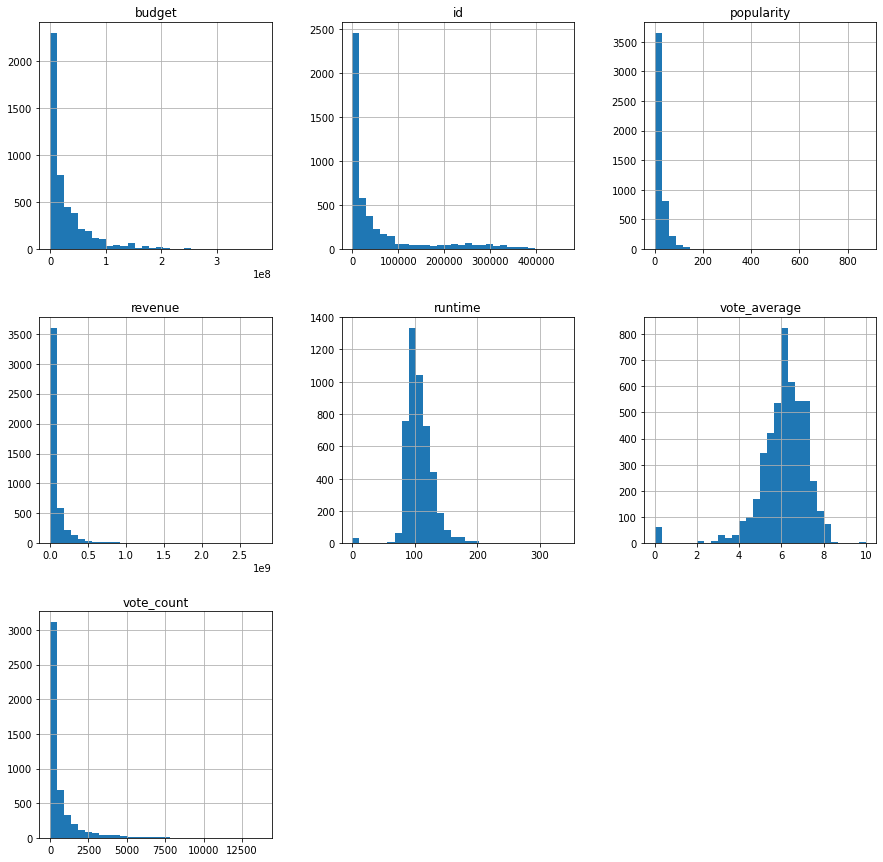

In [79]:
#Visualize the histogram of numerical features
movies_data.hist(bins=30, figsize=(15,15))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


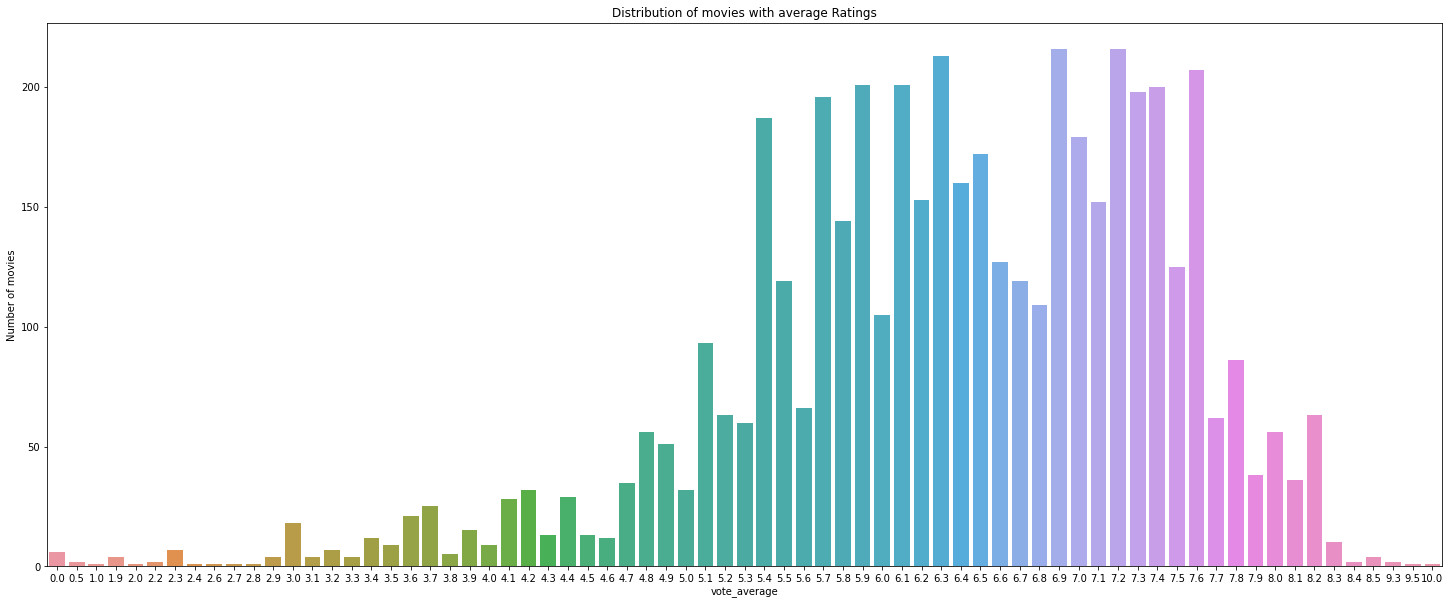

In [80]:
# Plot the distribution of movies with average ratings
plt.figure(figsize=(25,10))
sns.barplot(movies_data['vote_average'].unique(),movies_data['vote_average'].value_counts())
plt.xlabel("vote_average")
plt.ylabel("Number of movies")
plt.title("Distribution of movies with average Ratings")
plt.show()

We can observe that most of the average ratings are between 5 to 8.

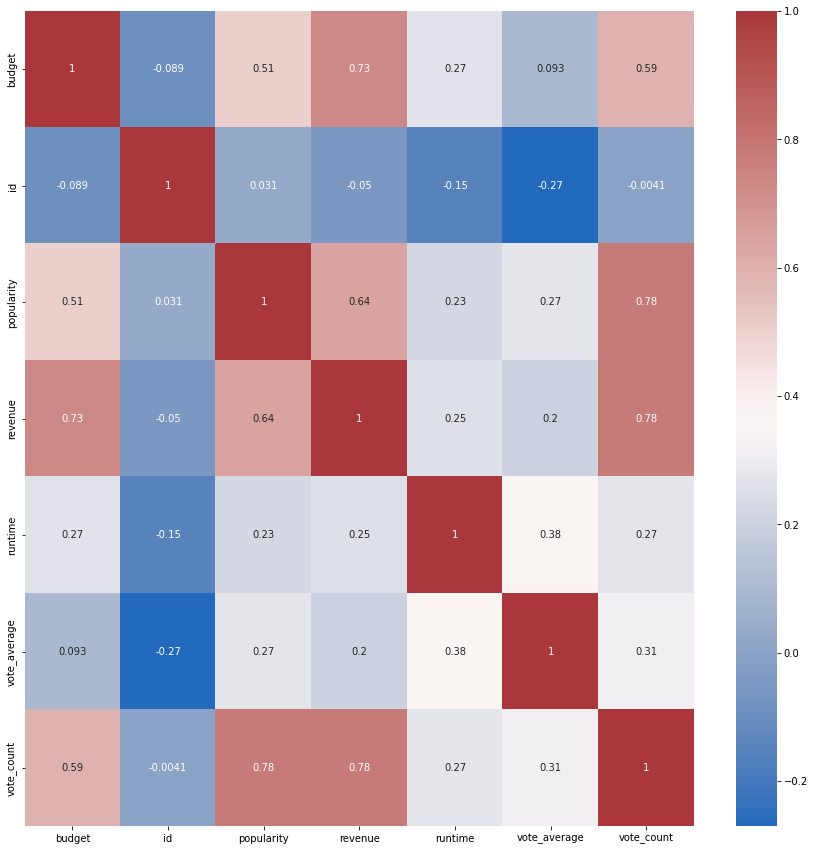

In [81]:
# Observe the correlation between the numerical features
plt.figure(figsize=(15, 15))
sns.heatmap(movies_data.corr(), annot=True,
           cmap='vlag');

- We can observe that budget and revenue are positively correlated.
- Also, vote_count is positively correlated with revenue, popularity and budget. This shows how the vote count and ratings are effected by the budget, popularity and revenue of the movie.

In [82]:
# Create arrays for genre and movie title to generate word cloud
genres=[]
for genre in movies_data.genres:
    x=genre.split('|')
    for i in x:
         if i not in genres:
            genres.append(str(i))
genres=str(genres)

movie_title=[]
for title in movies_data.title:
    movie_title.append(title[0:-7])
movie_title=str(movie_title) 

In [83]:
# Word cloud for genre and title of movies
wordcloud_genre=WordCloud(width=1500,height=800,background_color='black',min_font_size=2).generate(genres)
wordcloud_title=WordCloud(width=1500,height=800,background_color='black',min_font_size=2).generate(movie_title)

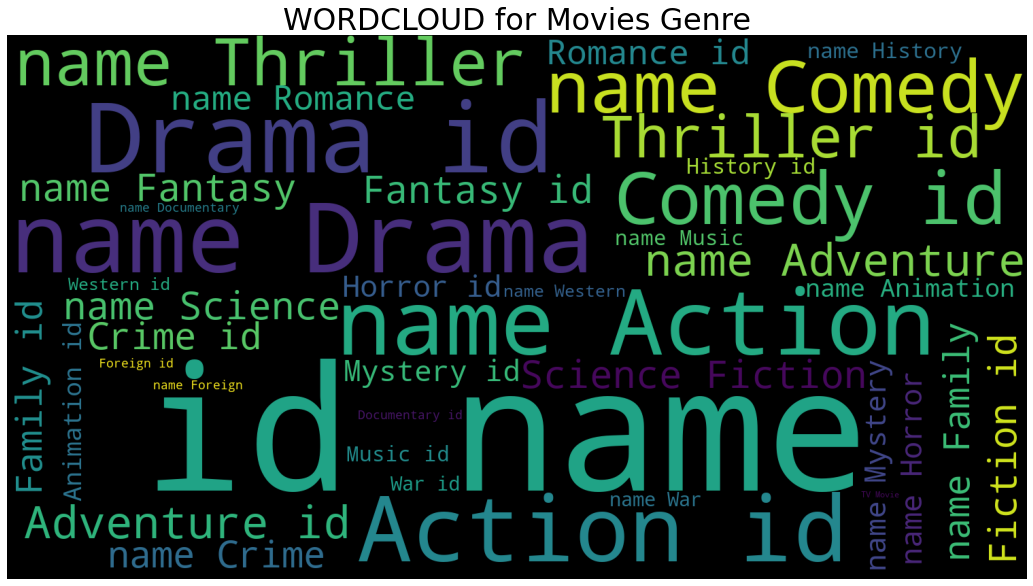

In [84]:
# look at word cloud for movies genre
plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('WORDCLOUD for Movies Genre',fontsize=30)
plt.imshow(wordcloud_genre)

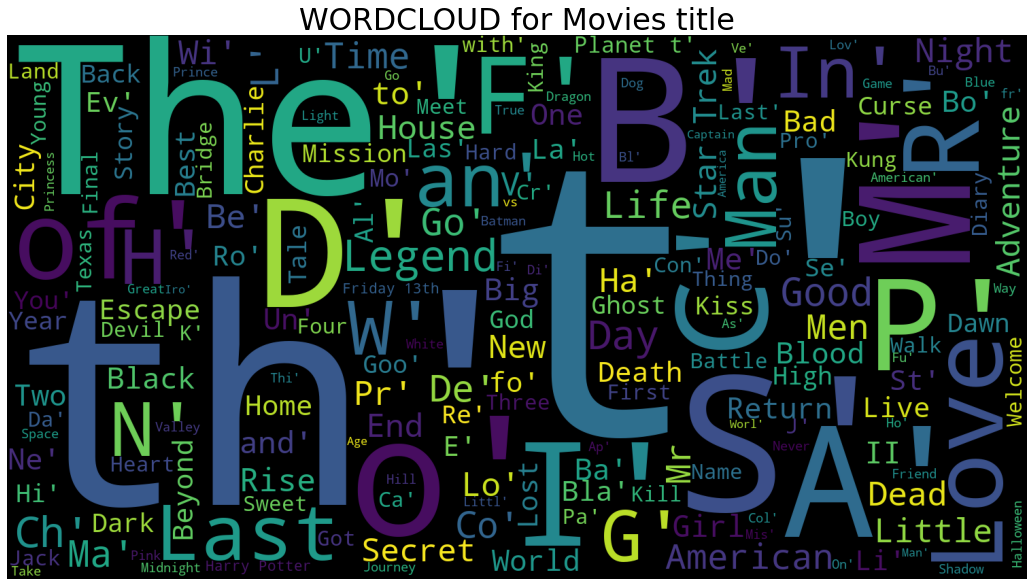

In [85]:
# Create word cloud for movies title
plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('WORDCLOUD for Movies title',fontsize=30)
plt.imshow(wordcloud_title)

In [86]:
# Copy the highest rated movies into high_rated dataset
df=movies_data.groupby(['title'])[['budget']].sum()
high_rated=df.nlargest(10,'budget')
high_rated.head()

,budget
title,
Pirates of the Caribbean: On Stranger Tides,380000000
Pirates of the Caribbean: At World's End,300000000
Avengers: Age of Ultron,280000000
Superman Returns,270000000
John Carter,260000000


<BarContainer object of 10 artists>

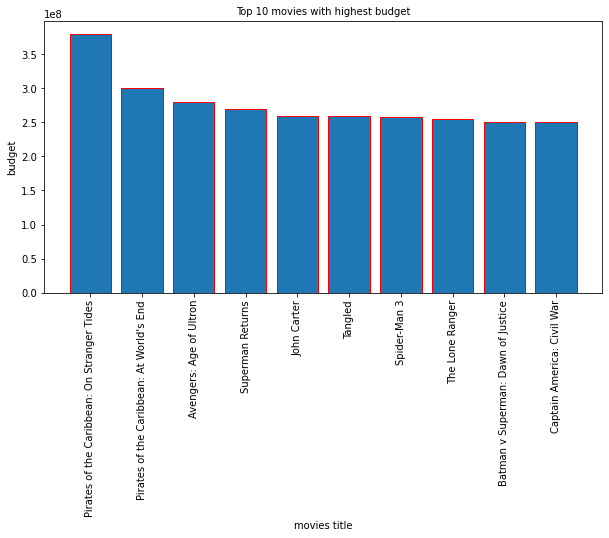

In [87]:
# Plot the top 10 high rated movies
plt.figure(figsize=(10,5))
plt.title('Top 10 movies with highest budget',fontsize=10)
plt.ylabel('budget',fontsize=10)
plt.xticks(fontsize=10,rotation=90)
plt.xlabel('movies title',fontsize=10)
plt.bar(high_rated.index,high_rated['budget'],linewidth=1,edgecolor='red')

# 4. Machine Learning Outcomes and Predictions
- The research papers that we have referred to showed us the different methods used to create a movie recommendation system. We have included three main filtering methods in our project: Demographic filtering, Content-based filtering, and Collaborative filtering.
- Our main goal is to recommend movies based on the best filters we could apply using automl for better and fast results. 
- We have implemented Demographic filtering by calculating a weighted rating of all the average votes and recommending the top 10 movies. Also, top movies based on popularity can be used to show the trending movies now in a particular region or genre. Although we get movie recommendations from this system, it is a basic recommender that shows generalized output to every user irrespective of their interests.
- Content-based filtering recommends movies based on the similarities in features like genre or overview or director, etc. We have implemented a content-based recommendation system based on the plot of the movie which is the overview feature. As it is text data we did some text processing and used Term Frequency - Inverse Data Frequency (TF-IDF) vector to separate the important words from the dataset into a matrix. We have calculated Cosine similarity to find a similarity score which helps us to recommend the top 10 movies based on this score. We were able to achieve similarity scores near to those mentioned in the research papers.
- Finally, collaborative filtering is implemented by considering the interests of each user based on the movies or content they like and finding the similarity between the items to recommend movies to another person.
- To improve the recommendations in further systems, we have predicted the rating of the movie using the automl module, autosklearn. Till now, we have excluded ratings that are less based on the vote counts or there might be a case where a rating is not present in the future. To avoid excluding these movies we have used the categorical features to predict the rating/vote_average of the movies.
- Using autosklearn, we have saved time and effort to find the perfect regression algorithm and tune the hyperparameters to fit the data to get the best predicted model. As autosklearn has components that choose the best algorithm and hyperparameters automatically we were able to finish this part in just a few lines of code. 
- Even though the research papers didn't show the exact metrics for the recommendation system we were able to achieve a validation score of 0.600 using autosklearn which improved from the previous assignment as we have included extra features.  The module ran 40 algorithms successfully to fit the data into a model which is definitely an improvement from assignment 2 where the model was able to run only 35 algorithms.
- As this is a regression model we evaluated the model using three metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2). We have achieved an MAE of 0.557, MSE of 0.780, and R2 of 0.594 which shows that the data is fit in the model at 59%.
- Although the score is not more, we can improve these metrics by using more data to train the model or include more features in the training dataset.

## **4.1 Demographic filtering**
This is a basic movie recommendation system which gives generalized recommendations based on genre or popularity or any other feature. In this method we need to calculate the score or rating for every movie and sort these scores to recommend the best movie based on ratings. <br>
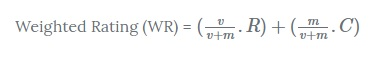<br>
where,

v is the number of votes for a movie; which is vote_count<br>
m is the minimum votes required to be listed for a recommendation;<br>
R is the average rating of the movie; which is vote_average And<br>
C is the mean vote across the whole report<br>

In [88]:
# Mean of the vote_average
C= movies_data['vote_average'].mean()
C

6.092171559442011

The mean rating for all the movies is approximately 6 on a scale of 10.<br>
The next step is to determine the value for m, the minimum votes required to be listed in the chart. We will use 80th percentile as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 80% of the movies in the list.

In [89]:
# 80th percentile of vote_count
m= movies_data['vote_count'].quantile(0.8)
m

957.6000000000004

In [91]:
# filter the movies that qualify for the recommendation
filter_movies = movies_data.copy().loc[movies_data['vote_count'] >= m]
filter_movies.shape

(961, 23)

There are 961 movies which qualify to be in the list. Next, we need to calculate our metric for each qualified movie. To do this, we will define a function, weighted_rating() and define a new feature score.

In [92]:
# Function for weighted rating
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [93]:
# Define a new feature 'score' and calculate its value with weighted_rating()
filter_movies['score'] = filter_movies.apply(weighted_rating, axis=1)

In [94]:
# View the first two rows of the filtered movies
filter_movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,title_credit,cast,crew,score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.116845
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.758257


In [95]:
#Sort movies based on the score calculated above
filter_movies = filter_movies.sort_values('score', ascending=False)

#Print the top 15 movies
filter_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.248353
662,Fight Club,9413,8.3,8.096134
3337,The Godfather,5893,8.4,8.077404
3232,Pulp Fiction,8428,8.3,8.074738
65,The Dark Knight,12002,8.2,8.044250
809,Forrest Gump,7927,8.2,7.972814
96,Inception,13752,8.1,7.969290
95,Interstellar,10867,8.1,7.937399
1990,The Empire Strikes Back,5879,8.2,7.904757
1818,Schindler's List,4329,8.3,7.900080


In [96]:
# Copy the 15 highest rated movies into high_rated_filtered dataset based on score
df1=filter_movies.groupby(['title'])[['score']].sum()
high_rated_filter1=df1.nlargest(15,'score')

<BarContainer object of 15 artists>

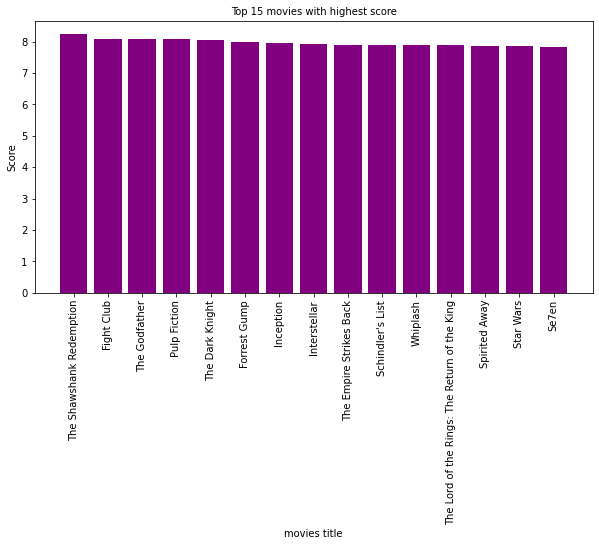

In [97]:
# Plot the top 15 filter movies based on the score
plt.figure(figsize=(10,5))
plt.title('Top 15 movies with highest score',fontsize=10)
plt.ylabel('Score',fontsize=10)
plt.xticks(fontsize=10,rotation=90)
plt.xlabel('movies title',fontsize=10)
plt.bar(high_rated_filter1.index,high_rated_filter1['score'], color='purple')

#### Prediction based on popularity
Using the popularity feature, we will be able to recommend movies which are trending now based on region or genre.

Text(0.5, 1.0, 'Popular Movies')

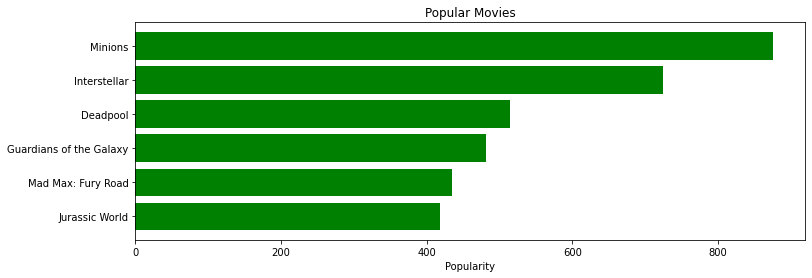

In [98]:
popular = movies_data.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(popular['title'].head(6),popular['popularity'].head(6), align='center',
        color='green')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

This is a basic recommendation system which just provides generalized recommendations to every user. It doesn't consider the interest of a user. To include this we will use content-based filtering in the next step.

## **4.2 Content based filtering**
In this recommender system the content of the movie (overview, cast, crew, keyword, tagline etc) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended.
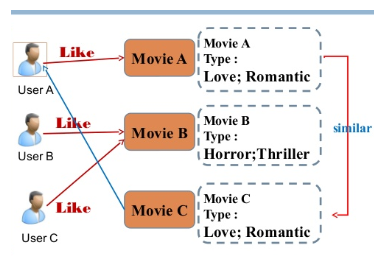<br>
<br>Basically, these recommender systems recommends a movie if a person liked a particular item, he or she will also like an item that is similar to it.

### 4.2.1 Plot description based Recommender
Overview feature will be used in this recommender system to find similar movies based on the plot desciption.


In [99]:
# View the top 5 rows based on overview of the movie
movies_data['overview'].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

We need to do text processing and convert the word vector of each overview. Now we'll compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each overview.This will give you a matrix where each column represents a word in the overview vocabulary (all the words that appear in at least one document) and each row represents a movie, as before.This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

In [100]:
# Define a TF-IDF Vectorizer Object and remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

# Replace NaN with an empty string
movies_data['overview'] = movies_data['overview'].fillna('')

# Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(movies_data['overview'])

tfidf_matrix.shape

(4803, 20978)

There are over 20,000 different words that were used to describe the 4800 movies in our dataset.<br>
Cosine similarity is used to calculate a numeric quantity that denotes the similarity between two movies. We used the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate. Mathematically, it is defined as follows:<br>
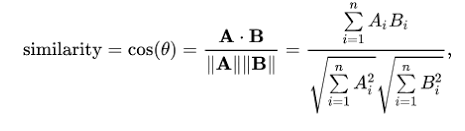 <br>


In [101]:
#Calculate the cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix) 

In [102]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(movies_data.index, index=movies_data['title']).drop_duplicates()

In [104]:
# Function that takes in movie title as input and outputs most similar movies

def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return movies_data['title'].iloc[movie_indices]

In [105]:
# Predict top 10 movies based on the plot of the movie The Dark Knight Rises
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [106]:
# Predict top 10 movies based on the plot of the movie Minions
get_recommendations('Minions')

506                           Despicable Me 2
221                           Stuart Little 2
1218                           The Guilt Trip
2511                               Home Alone
3944                                  Freeway
2892                        Darling Companion
505     The League of Extraordinary Gentlemen
3188                          Velvet Goldmine
1733                        The Spy Next Door
70                             Wild Wild West
Name: title, dtype: object

While our system found movies with similar plot descriptions, the quality of recommendations is not that great. "The Dark Knight Rises" returns all Batman movies while it is more likely that the people who liked that movie are more inclined to enjoy other Christopher Nolan movies. This is something that cannot be captured by the present system which is one of the drawback of content based filtering.<br>

## 4.2.2 Credits, genres and keywords based recommender

In [107]:
# Use literal_eval to evaluate the strings in the columns cast, crew, keywords and genres
features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    movies_data[feature] = movies_data[feature].apply(literal_eval)

In [108]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [109]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [110]:
# Define new director, cast, genres and keywords features that are in a suitable form.
movies_data['director'] = movies_data['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    movies_data[feature] = movies_data[feature].apply(get_list)

In [111]:
# Print the new features of the first 3 films
movies_data[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


In [112]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [113]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    movies_data[feature] = movies_data[feature].apply(clean_data)

In [114]:
def create_mixed_dir(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
movies_data['mixed_dir'] = movies_data.apply(create_mixed_dir, axis=1)

In [115]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(movies_data['mixed_dir'])

In [116]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [117]:
# Reset index of our main DataFrame and construct reverse mapping as before
movies_data = movies_data.reset_index()
indices = pd.Series(movies_data.index, index=movies_data['title'])

In [118]:
# Top 10 movie recommendations based on the keyword, cast, crew and genre
get_recommendations('Avatar', cosine_sim2)

206                         Clash of the Titans
71        The Mummy: Tomb of the Dragon Emperor
786                           The Monkey King 2
103                   The Sorcerer's Apprentice
131                                     G-Force
215      Fantastic 4: Rise of the Silver Surfer
466                            The Time Machine
715                           The Scorpion King
1      Pirates of the Caribbean: At World's End
5                                  Spider-Man 3
Name: title, dtype: object

In [119]:
# Top 10 movie recommendations based on the keyword, cast, crew and genre
get_recommendations('Spider-Man', cosine_sim2)

5                                   Spider-Man 3
30                                  Spider-Man 2
2157                                 Daybreakers
2592                         Highlander: Endgame
1266    Cirque du Freak: The Vampire's Assistant
547                                 Sucker Punch
71         The Mummy: Tomb of the Dragon Emperor
381             The Nutcracker: The Untold Story
786                            The Monkey King 2
3607                             The Beastmaster
Name: title, dtype: object

From the above recommendations we can observe that the recommender has been successful in capturing more information as more features are included and has given us (arguably) better recommendations. Also, a DC or Marvel movie fan might like those company movies so we can add production_company to narrow down tha recommendations more. The weight of the director can be increased as well by adding the feature multiple times in the mixed_dir.

# 4.3 Collaborative filtering
- The Content based engine created above suffers from some severe limitations. It is only capable of suggesting movies which are close to a certain movie. That is, it is not capable of capturing tastes and providing recommendations across genres.
- Also, the engine that we built is not really personal in that it doesn't capture the personal tastes and biases of a user. Anyone querying our engine for recommendations based on a movie will receive the same recommendations for that movie, regardless of who she/he is.
- Therefore, in this section, we will use a technique called Collaborative Filtering to make recommendations to Movie Watchers. Collaborative Filtering is based on the idea that users similar to another user A can be used to predict how much user A will like a particular product or service those users have used/experienced but user A have not.
- We have used the Surprise library that used extremely powerful algorithms like Singular Value Decomposition (SVD) to minimise RMSE (Root Mean Square Error) and give great recommendations.

In [161]:
pip install surprise

     |████████████████████████████████| 11.8 MB 22.7 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1630189 sha256=24156499b098b909dd1df081b14370edbd47f2bb360e5f0b184636d37aa6c98d
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [172]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
from sklearn.model_selection import KFold

# Read csv file into dataset ratings
reader = Reader()
movie_ratings = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/ratings_small.csv')
movie_ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [173]:
data_ratings = Dataset.load_from_df(movie_ratings[['userId', 'movieId', 'rating']], reader)
kf = KFold(n_splits=5)
kf.split(data_ratings)

<generator object _BaseKFold.split at 0x7f7f865f3d50>

In [174]:
# Implement Single Value Decomposition(SVD) and validate
svd = SVD()
cross_validate(svd, data_ratings, measures=['RMSE', 'MAE'])

{'fit_time': (8.476125717163086,
  6.52921986579895,
  4.096736431121826,
  4.071697473526001,
  7.881182432174683),
 'test_mae': array([0.68801248, 0.69179547, 0.68942674, 0.69236098, 0.69046421]),
 'test_rmse': array([0.89470754, 0.89598086, 0.89450693, 0.90159134, 0.89735308]),
 'test_time': (0.2502017021179199,
  0.16898775100708008,
  0.29818058013916016,
  0.11287426948547363,
  0.15702342987060547)}

The mean Root mean square error is approximately 0.89 which shows the model performance is very good.

In [175]:
# Train on the dataset to get predictions
train_data = data_ratings.build_full_trainset()
svd.fit(train_data)

In [176]:
# Pick a random user id to check the ratings
movie_ratings[movie_ratings['userId'] == 120]

,userId,movieId,rating,timestamp
18342,120,1,2.5,1167422234
18343,120,32,3.5,1167420751
18344,120,36,3.0,1125350649
18345,120,47,3.5,1167421762
18346,120,50,4.0,1167421675
...,...,...,...,...
18475,120,6874,2.0,1167421715
18476,120,7616,4.5,1167421410
18477,120,8636,4.0,1167421751
18478,120,32587,1.5,1167420746


In [179]:
# Predict for the user 120 for the movie with id 300
svd.predict(120, 300, 10)

Prediction(uid=120, iid=300, r_ui=10, est=3.6210451200565026, details={'was_impossible': False})

For movie with ID 300, we get an estimated prediction of 3.62 for the user 120. The best feature of this recommendation system is that it doesnt check the movie title or anything about the movie. It purely checks the assigned movied ID and tries to predict rating based on how the other users have predicted the movie and recommends he movie based on these ratings.

## 4.4 Movie rating prediction
There might be instances where ratings are not present or in less number because of less vote counts. We can build a model to predict the rating so that all movies are present on the recommendation based on the predicted ratings. Also, we can include this with collaborative filtering to improve the recommendations.

In [ ]:
# Copy movies to data
data = movies_data.copy() # copy the data to do further processing

In [ ]:
#extracting year to help in predicting the vote_average
data['year'] = pd.DatetimeIndex(data['release_date']).year

In [ ]:
data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,tagline,title,vote_average,vote_count,title_credit,cast,crew,director,mixed_dir,year
0,0,237000000,"[action, adventure, fantasy]",http://www.avatarmovie.com/,19995,"[cultureclash, future, spacewar]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[samworthington, zoesaldana, sigourneyweaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",jamescameron,cultureclash future spacewar samworthington zo...,2009.0
1,1,300000000,"[adventure, fantasy, action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drugabuse, exoticisland]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",goreverbinski,ocean drugabuse exoticisland johnnydepp orland...,2007.0
2,2,245000000,"[action, adventure, crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, basedonnovel, secretagent]",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[danielcraig, christophwaltz, léaseydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...",sammendes,spy basedonnovel secretagent danielcraig chris...,2015.0
3,3,250000000,"[action, crime, drama]",http://www.thedarkknightrises.com/,49026,"[dccomics, crimefighter, terrorist]",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[christianbale, michaelcaine, garyoldman]","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",christophernolan,dccomics crimefighter terrorist christianbale ...,2012.0
4,4,260000000,"[action, adventure, sciencefiction]",http://movies.disney.com/john-carter,49529,"[basedonnovel, mars, medallion]",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[taylorkitsch, lynncollins, samanthamorton]","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",andrewstanton,basedonnovel mars medallion taylorkitsch lynnc...,2012.0


In [ ]:
# find the correlation between numerical features
data.corr().round(3)

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count,year
index,1.000,-0.762,0.191,-0.414,-0.522,-0.319,-0.120,-0.442,-0.160
budget,-0.762,1.000,-0.089,0.505,0.731,0.270,0.093,0.593,0.169
id,0.191,-0.089,1.000,0.031,-0.050,-0.154,-0.271,-0.004,0.435
popularity,-0.414,0.505,0.031,1.000,0.645,0.226,0.274,0.778,0.102
revenue,-0.522,0.731,-0.050,0.645,1.000,0.251,0.197,0.781,0.090
runtime,-0.319,0.270,-0.154,0.226,0.251,1.000,0.375,0.272,-0.167
vote_average,-0.120,0.093,-0.271,0.274,0.197,0.375,1.000,0.313,-0.198
vote_count,-0.442,0.593,-0.004,0.778,0.781,0.272,0.313,1.000,0.114
year,-0.160,0.169,0.435,0.102,0.090,-0.167,-0.198,0.114,1.000


In [ ]:
#separate the categorical features
cols = ['vote_average','genres','keywords','original_language','overview','original_title','production_companies',
            'production_countries','spoken_languages','homepage','tagline','status','title','cast','crew','release_date','mixed_dir','director','title_credit']

In [ ]:
# separate the features and target feature
x=data.drop(cols,axis=1)
y=data.vote_average

In [ ]:
#split the data into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.30)

## 4.5 AutoML - Autosklearn implementation
- Auto-sklearn frees a machine learning user from algorithm selection and hyperparameter tuning. 
- It leverages recent advantages in Bayesian optimization, meta-learning and ensemble construction. Meta learning is used to initialize parameters, Bayesian reasoning auto tune hyperparameters during ensemble construction and optimization process. 
- Autosklearn automatically creates an ensemble of top-performing models discovered as part of the optimization process.
- Depending on whether your prediction task is classification or regression, you create and configure an instance of the AutoSklearnClassifier or AutoSklearnRegressor class, fit it on your dataset, and that’s it. The resulting model can then be used to make predictions directly or saved to file (using pickle) for later use.

![](https://drive.google.com/uc?export=view&id=10FU52zUpR9GofyNmRBrT5ao0-jiIw3ID)

In [ ]:
pip install auto-sklearn

     |████████████████████████████████| 6.4 MB 13.9 MB/s 
     |████████████████████████████████| 38.1 MB 204 kB/s 
     |████████████████████████████████| 22.3 MB 85.9 MB/s 
     |████████████████████████████████| 1.1 MB 58.7 MB/s 
     |████████████████████████████████| 837 kB 62.8 MB/s 
     |████████████████████████████████| 4.3 MB 51.5 MB/s 
     |████████████████████████████████| 4.0 MB 58.6 MB/s 
     |████████████████████████████████| 260 kB 74.7 MB/s 
     |████████████████████████████████| 596 kB 62.3 MB/s 
     |████████████████████████████████| 136 kB 61.1 MB/s 
     |████████████████████████████████| 45 kB 4.7 MB/s 
  Created wheel for auto-sklearn: filename=auto_sklearn-0.14.6-py3-none-any.whl size=6602835 sha256=4f931eb5bdb917328e6f5f15b5cc8d646ff0871a224ee003458828825c605528
  Stored in directory: /root/.cache/pip/wheels/6a/70/48/db9c00457f87a751083ca0d5c99bf34387dde818c705bd9800
  Created wheel for pynisher: filename=pynisher-0.6.4-py3-none-any.whl size=7043 sha256=368

In [ ]:
#Implement automl-autosklearn regressor for predicting the vote_average
import autosklearn.regression
automl = autosklearn.regression.AutoSklearnRegressor(time_left_for_this_task=5*60, 
                                                     per_run_time_limit=30, 
                                                     tmp_folder='/content/drive/MyDrive/Colab Notebooks/Datasets/example-assnt3') #create a folder to store the log of autosklearn

automl.fit(X_train, y_train)

AutoSklearnRegressor(per_run_time_limit=30, time_left_for_this_task=300,
                     tmp_folder='/content/drive/MyDrive/Colab '
                                'Notebooks/Datasets/example-assnt3')

In [ ]:
# Print the summary of statistics
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: ac555258-c1d0-11ec-8843-0242ac1c0002
  Metric: r2
  Best validation score: 0.601128
  Number of target algorithm runs: 40
  Number of successful target algorithm runs: 37
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 3
  Number of target algorithms that exceeded the memory limit: 0



In [ ]:
# Show the final ensemble constructed by auto-sklearn
print(automl.show_models())

{24: {'model_id': 24, 'rank': 1, 'cost': 0.3988721531924919, 'ensemble_weight': 0.48, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f7f779ecdd0>, 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7f7f687fdbd0>, 'regressor': <autosklearn.pipeline.components.regression.RegressorChoice object at 0x7f7f6878fd90>, 'sklearn_regressor': AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                  learning_rate=0.010571278032840276, n_estimators=116,
                  random_state=1)}, 38: {'model_id': 38, 'rank': 2, 'cost': 0.40649047558472273, 'ensemble_weight': 0.06, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f7f68617850>, 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7f7f687d5cd0>, 'regressor': <autos

In [ ]:
# View the models found by auto-sklearn
print(automl.leaderboard())

          rank  ensemble_weight               type      cost   duration
model_id                                                               
24           1             0.48           adaboost  0.398872   2.211665
38           2             0.06  gradient_boosting  0.406490   1.318630
20           3             0.10        extra_trees  0.411967   6.296594
22           4             0.24  gradient_boosting  0.413613  10.092960
16           5             0.02  gradient_boosting  0.432966   1.334264
32           6             0.02      decision_tree  0.519531   2.101259
36           7             0.02  gradient_boosting  0.630946   1.328016
7            8             0.06      random_forest  0.713290   7.822541


In [ ]:
# Get the configuration space of the model
print(automl.get_configuration_space(X_train, y_train))

Configuration space object:
  Hyperparameters:
    data_preprocessor:__choice__, Type: Categorical, Choices: {feature_type}, Default: feature_type
    data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__, Type: Categorical, Choices: {encoding, no_encoding, one_hot_encoding}, Default: one_hot_encoding
    data_preprocessor:feature_type:categorical_transformer:category_coalescence:__choice__, Type: Categorical, Choices: {minority_coalescer, no_coalescense}, Default: minority_coalescer
    data_preprocessor:feature_type:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction, Type: UniformFloat, Range: [0.0001, 0.5], Default: 0.01, on log-scale
    data_preprocessor:feature_type:numerical_transformer:imputation:strategy, Type: Categorical, Choices: {mean, median, most_frequent}, Default: mean
    data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__, Type: Categorical, Choices: {minmax, none, normalize, power_t

In [ ]:
# evaluate the best model by showing the metrics
y_pred = automl.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE: %.3f" % mae) # Mean Absolute Error
print("MSE: %.3f" % np.sqrt(mean_squared_error(y_test,y_pred))) # Mean Squared Error
print("R2: %.3f" % r2_score(y_test,y_pred)) # R square


MAE: 0.557
MSE: 0.780
R2: 0.594


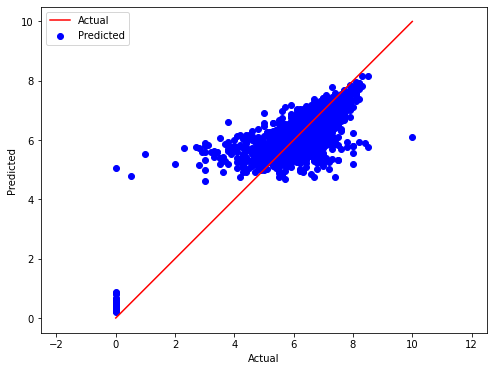

In [ ]:
#Scatter plot to show the actual vs predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, c='blue')
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'r-')
plt.xlabel('Actual', fontsize=10)
plt.ylabel('Predicted', fontsize=10)
plt.legend(['Actual', 'Predicted'])
plt.axis('equal')
plt.show()

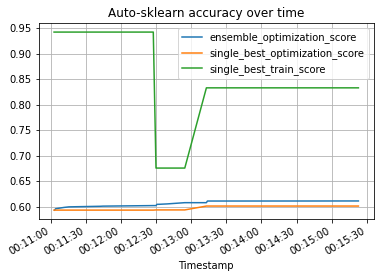

In [ ]:
# performance_over_time_ attribute to plot the performance over train time
perform_time = automl.performance_over_time_
perform_time.plot(
    x="Timestamp",
    kind="line",
    legend=True,
    title="Auto-sklearn accuracy over time",
    grid=True,
)
plt.show()

The Mean absolute Error is 0.557, Mean Square Error is 0.780, R square is 0.594 and validation score of 60%. It shows that the model can predict the data with 59-60% accuracy which is more than what we got in Assignment 2. We have included additional features in this assignment and able to achieve that extra accuracy. In future, if we include more features and add more training data the accuracy can be improved much more.


# 5. Visualization
- In this project, we have used multiple visualizations like bar charts, histograms, tables, heat map, and scatter plots to understand the data and check the results.
- In the filterings, we have used bar charts and tables to show the movie recommendations with respective filters.
- For the final results using AutoML, we have used a scatter plot to check how close the model can predict the values compared to actual values. As we can see that there is still some improvement needed for the model to predict near to accurate values. We couldn't find more data related to this project to improve our model performance. So we were able to achieve around 60% of accuracy.
- In the leaderboard of the automl we can see which algorithm performed better in the autosklearn regressor. Adaboost ranked number 1 among 40 algorithms.
- Also, auto-sklearn performance over time is plotted to check how well autosklearn performed in training the data.
- Compared to assignment 2, we have added more visualizations to understand the data and results.
- All the results and visualizations in this project are very easy to understand without much technical jargon so anyone could review and understand the project easily.
- The research papers and ideas we used are mentioned in the reference section below.

# 6. Trailer Documentation
- Overall, the learning from this project was great. We were able to do a lot of research and implement new techniques which we didn't implement till now which was very exciting. We gained a lot of knowledge by working on this project.<br>
- Nowadays, everyone finds it time-taking to find the right content on the OTT platforms. We always wonder how these platforms started recommending movies based on the content we watch or search. Now after implementing this project, we came to know a lot about these recommendation systems.<br>
- The best part about this project is using AutoML, Auto-sklearn. Till now for all the projects, it used to be a big task to select the right parameters and right algorithms to use to build an effective model. But using Auto-sklearn, we saved so much time and effort on finding the best algorithm without compromising on the accuracy.<br>
- In the future, we would like to integrate it with the front end to build an end to end movie recommendation system.<br>
- Also, we can use this system as a base and build a general recommendation system in various areas such as recommending clothes, books, music, etc. <br>
- We can use this data to generate more reports and visualizations in Power BI in future.


## Remarks
Everyone in the team contributed and helped each other at each and every point of the project. From the initial stage of researching which project to choose, the research papers to select for our project, gathering data, learning about new filtering methods, learning about automl, visualizing the results, contributions to documentation and presentation, we have divided everything amoing us equally which helped us at each and every stage. Overall, with the team effort we have implemented this project successfully by gaining lot of knowledge. 


### References
Garg, K., Sharma, J., Sharma, K. & Sharma, K.A. (2021, January). *Product Recommendation System a Comprehensive Review.* https://www.researchgate.net/publication/348605509_Product_Recommendation_System_a_Comprehensive_Review<br>

Huang, S.(2018, January 24). *Introduction to Recommender System. Part 1 (Collaborative Filtering, Singular Value Decomposition).* Hackernoon. https://hackernoon.com/introduction-to-recommender-system-part-1-collaborative-filtering-singular-value-decomposition-44c9659c5e75<br>

Petluri, K. & Varma, N.A. (2021, December). *Movie Recommender System using critic consensus*. https://arxiv.org/abs/2112.11854v1